# App groups
In this notebook we will investigate which use patterns can be found when the users are grouped based on which apps they use.

## Overview
**1. Import**\
**2. Binary app features**\
**2.1 Unsupervised clustering**\
**3. App features as percentage**\
**3.1 Unsupervised clustering**\
**4. N-grams**\
**4.1 Frequent apps**\
**4.2 2-grams**\
**4.3 3-grams**\
**4.4 4-grams**\
**4.5 5-grams**\
**5. Transition probabilitie**\
**5.1 NMF for transition matrix comparison**\
**5.2 Frequent apps**

## 1. Import

In [1]:
from sklearn.feature_extraction.text import CountVectorizer
from spmf import Spmf
import numpy as np
import pandas as pd
import os
import re
import matplotlib.pyplot as plt
import ast
pd.options.plotting.backend = "plotly"
import plotly.express as px
# from chart_studio import plotly
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.subplots as sp
pd.options.display.max_colwidth = None
pd.set_option('display.max_rows', 70)
from pandas.plotting import table 
import nltk
import seaborn as sns
%matplotlib inline
import random
import matplotlib.gridspec as grid
import matplotlib
import sklearn
from sklearn.cluster import Birch
from sklearn.cluster import MiniBatchKMeans

In [ ]:
data=pd.read_csv("sorted_coded_session_293s_merged.csv")

## 2. Binary app features
To group the users based on the apps they use, it is first necessary to be able to describe each user with respect to which apps they use. The first method to do this, which we will test in this section, is to let each app be represented by a binary feature indicating whether the app is used by the user.

In [ ]:
apps=data.package_name.unique()

In [ ]:
app_count=pd.concat([pd.DataFrame(np.arange(10000).repeat(len(apps)),columns=['user_id']),pd.concat([pd.DataFrame(apps,columns=['package_name'])]*10000,ignore_index=True)],axis=1)

https://stackoverflow.com/questions/64110340/count-number-of-times-each-item-in-list-occurs-in-a-pandas-dataframe-column-with
21.12.2021

In [5]:
app_count_2=data.groupby(['user_id','package_name']).agg({'session':'size'}).reset_index()

In [9]:
app_count_2

,user_id,package_name,session
0,0,air.ca.udesignit.kitchen,4
1,0,bbc.mobile.weather,102
2,0,bg.abv.andro.emailapp,510
3,0,com.acobot.en,2
4,0,com.adobe.reader,159
...,...,...,...
924066,9999,com.whatsapp,2182
924067,9999,uk.co.ee.myee,16
924068,9999,uk.co.nationalrail.google,11
924069,9999,uk.co.santander.santanderUK,44


In [10]:
app_count

,user_id,package_name
0,0,com.facebook.katana
1,0,com.android.chrome
2,0,com.google.android.apps.photos
3,0,com.whatsapp
4,0,com.google.android.youtube
...,...,...
670879995,9999,com.roulettecamchata
670879996,9999,com.wondertechstudio.electronicbugdetector
670879997,9999,com.chirpgps.mobile
670879998,9999,com.pullapp.mobile.findfriend.locator


In [13]:
app_count=app_count.merge(app_count_2,how='left',on=['user_id','package_name']).fillna(0)

In [15]:
app_count.to_csv("app_count.csv",index=False)

In [2]:
app_count=pd.read_csv('app_count.csv')

In [7]:
app_count['session']=app_count.session>0

In [8]:
app_count

,user_id,package_name,session
0,0,com.facebook.katana,True
1,0,com.android.chrome,True
2,0,com.google.android.apps.photos,True
3,0,com.whatsapp,True
4,0,com.google.android.youtube,True
...,...,...,...
670879995,9999,com.roulettecamchata,False
670879996,9999,com.wondertechstudio.electronicbugdetector,False
670879997,9999,com.chirpgps.mobile,False
670879998,9999,com.pullapp.mobile.findfriend.locator,False


In [10]:
app_count=app_count.pivot(index="user_id", columns="package_name", values="session")

In [11]:
app_count

package_name,AppZappy.NIRailAndBus,AutomateItPro.mainPackage,B4A.BigFivePersonalityTest,ChilliZET.app,DOCECG2.doctor,DVBLink.DVBLink,Draziw.Button.Mines,Duel.Deck,Face.Sorter,Game.SpeedMoto,...,zsj.android.systemappremover,zumbafitness.weightlossdance,zw.co.zimapp.latest.rczapp,zw.voice.pocket.game.en,zxc.com.gkdvr,zz.freesport.fitnessworkout.jump_rope,zz.freesport.fitnessworkout.qigong,zz.workout.fitness.dumbbell_30min,zzy.heartEN,zzz.spider.solitaire.poker.hd
user_id,,,,,,,,,,,,,,,,,,,,,
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Now that the new features have been created the data is saved.

In [12]:
app_count.to_csv("apps_for_users.csv",index=True)

### 2.1 Unsupervised clustering
Now that the users are descibed with which apps they use, they need to be divided into groups. To do this we apply an unsupervised clustering algrorithm. In this section it is the mini batch k-means algorithm which is used.

In [31]:
mbk = MiniBatchKMeans(
    init="k-means++",
    n_clusters=5,
)
mbk.fit(app_count)

MiniBatchKMeans(n_clusters=5)

In [32]:
pd.DataFrame({'cluster':mbk.predict(app_count)}).groupby('cluster').size()

cluster
0       1
1    7069
2       1
3       1
4    2928
dtype: int64

In [30]:
pd.DataFrame({'cluster':mbk.predict(app_count)}).groupby('cluster').size()

cluster
0       1
1    5122
2     537
3    2481
4    1859
dtype: int64

As we can see above the the MiniBatchKMeans give very unstable results. This could possibly be due to the true and false, not providing enough information on which ones to group to getter.

## 3. App features as percentage
To address the issue of unstability in the clustering, we descirbe the users through how app features which each descibe the percentage of a users observations which is made up of the given app.

In [34]:
app_count

,user_id,package_name,session
0,0,com.facebook.katana,2363.0
1,0,com.android.chrome,1212.0
2,0,com.google.android.apps.photos,118.0
3,0,com.whatsapp,306.0
4,0,com.google.android.youtube,380.0
...,...,...,...
670879995,9999,com.roulettecamchata,0.0
670879996,9999,com.wondertechstudio.electronicbugdetector,0.0
670879997,9999,com.chirpgps.mobile,0.0
670879998,9999,com.pullapp.mobile.findfriend.locator,0.0


In [3]:
data=pd.read_csv("sorted_coded_session_293s_merged.csv")

In [4]:
app_count=app_count.merge(data.groupby('user_id').agg({'session':'size'}).reset_index(),on='user_id')
app_count['percentage']=app_count.session_x/app_count.session_y

In [7]:
app_count=app_count.drop(columns=['session_x','session_y'])

In [8]:
app_count=app_count.pivot(index="user_id", columns="package_name", values="percentage")

In [10]:
app_count.to_csv("app_count_percentage.csv",index=True)

In [2]:
app_count=pd.read_csv("app_count_percentage.csv")

In [3]:
app_count

,user_id,AppZappy.NIRailAndBus,AutomateItPro.mainPackage,B4A.BigFivePersonalityTest,ChilliZET.app,DOCECG2.doctor,DVBLink.DVBLink,Draziw.Button.Mines,Duel.Deck,Face.Sorter,...,zsj.android.systemappremover,zumbafitness.weightlossdance,zw.co.zimapp.latest.rczapp,zw.voice.pocket.game.en,zxc.com.gkdvr,zz.freesport.fitnessworkout.jump_rope,zz.freesport.fitnessworkout.qigong,zz.workout.fitness.dumbbell_30min,zzy.heartEN,zzz.spider.solitaire.poker.hd
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9996,9996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9997,9997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9998,9998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 3.1 Unsupervised clustering
We are now ready to test if the reformulated user descriptions work better with the clustering algorithm. Again the mini batch k-means is used.

In [4]:
mbk = MiniBatchKMeans(
    init="k-means++",
    n_clusters=5,
)
mbk.fit(app_count)

pd.DataFrame({'cluster':mbk.predict(app_count)}).groupby('cluster').size()


cluster
0    1958
1    2129
2    1833
3    2092
4    1988
dtype: int64

In [5]:
mbk = MiniBatchKMeans(
    init="k-means++",
    n_clusters=5,
)
mbk.fit(app_count)

pd.DataFrame({'cluster':mbk.predict(app_count)}).groupby('cluster').size()

cluster
0    1888
1    2095
2    2273
3    1834
4    1910
dtype: int64

In [6]:
mbk = MiniBatchKMeans(
    init="k-means++",
    n_clusters=5,
)
mbk.fit(app_count)

pd.DataFrame({'cluster':mbk.predict(app_count)}).groupby('cluster').size()

cluster
0    2070
1    2117
2    1780
3    2125
4    1908
dtype: int64

In [3]:
mbk = MiniBatchKMeans(
    init="k-means++",
    n_clusters=5,
)
mbk.fit(app_count)

pd.DataFrame({'cluster':mbk.predict(app_count)}).groupby('cluster').size()


cluster
0    2174
1    1957
2    1916
3    1922
4    2031
dtype: int64

So it looks like relaying on the percentage of each apps give more evenly distributed and more stable clusters. This approach will therefore form the bases of the grouping based on apps.
To be able to reproduce results, a random state is given.

In [7]:
mbk = MiniBatchKMeans(init="k-means++",n_clusters=5,random_state=3)
mbk.fit(app_count)
pd.DataFrame({'cluster':mbk.predict(app_count)}).groupby('cluster').size()

cluster
0    2056
1    1983
2    1954
3    2004
4    2003
dtype: int64

In [13]:
clusters=pd.DataFrame({'cluster':mbk.predict(app_count)}).reset_index().rename(columns={'index':'user_id'})

In [12]:
data=pd.read_csv("sorted_coded_session_293s_merged.csv")

In [16]:
data=data.merge(clusters,on='user_id')

In [20]:
data=data.drop(columns=['app_code','time_spend','sequence_number','sequence_Start_time','sequence_end_time','start_time','end_time','sleep_time','new_session'])

In [1]:
data.to_csv("names_with_app_clusters.csv",index=False)

NameError: name 'data' is not defined

In [2]:
data_clusters=pd.read_csv("names_with_app_clusters.csv")

In [3]:
data_clusters

,user_id,package_name,session,cluster
0,0,com.facebook.katana,0,0
1,0,com.android.chrome,0,0
2,0,com.google.android.apps.photos,0,0
3,0,com.facebook.katana,0,0
4,0,com.whatsapp,0,0
...,...,...,...,...
228760320,9999,com.google.android.googlequicksearchbox,5646,3
228760321,9999,com.android.chrome,5646,3
228760322,9999,com.google.android.apps.docs,5646,3
228760323,9999,com.microsoft.office.outlook,5647,3


## 4. N-grams
Now that we the users have been grouped into clusters we are ready to start analysing the patterns within the groups. The first approach is based on text analysis and N-grams

In [4]:
courpus_cluster0=data_clusters[data_clusters.cluster==0].groupby(['user_id','session']).package_name.apply(' '.join)
courpus_cluster0='start '+ courpus_cluster0 + ' end'
courpus_cluster1=data_clusters[data_clusters.cluster==1].groupby(['user_id','session']).package_name.apply(' '.join)
courpus_cluster1='start '+ courpus_cluster1 + ' end'
courpus_cluster2=data_clusters[data_clusters.cluster==2].groupby(['user_id','session']).package_name.apply(' '.join)
courpus_cluster2='start '+ courpus_cluster2 + ' end'
courpus_cluster3=data_clusters[data_clusters.cluster==3].groupby(['user_id','session']).package_name.apply(' '.join)
courpus_cluster3='start '+ courpus_cluster3 + ' end'
courpus_cluster4=data_clusters[data_clusters.cluster==4].groupby(['user_id','session']).package_name.apply(' '.join)
courpus_cluster4='start '+ courpus_cluster4 + ' end'

We now determine the number of sessions a pattern must occur in, in each group, to full fil a min. support of 0.25%.

In [6]:
print(courpus_cluster0.shape[0]/100*0.25)
print(courpus_cluster1.shape[0]/100*0.25)
print(courpus_cluster2.shape[0]/100*0.25)
print(courpus_cluster3.shape[0]/100*0.25)
print(courpus_cluster4.shape[0]/100*0.25)

39403.4825
37952.4075
37981.32
37692.075
38908.52


### 4.1 Frequent apps

In [13]:
vectorizer_1_c0 = CountVectorizer(analyzer='word',tokenizer=lambda text: re.split(' ',text), ngram_range=(1,1),lowercase=False)
vectorization_1_c0=vectorizer_1_c0.fit_transform(courpus_cluster0.values)
print("Number of frequent apps:",len(vectorizer_1_c0.get_feature_names_out()[np.where((vectorization_1_c0>0).sum(axis=0)>=39404)[1]]))#31#41
vectorizer_1_c0.get_feature_names_out()[np.where((vectorization_1_c0>0).sum(axis=0)>=39404)[1]]

Number of frequent apps: 73


array(['bbc.mobile.news.uk', 'bbc.mobile.weather', 'com.amazon.kindle',
       'com.amazon.mShop.android.shopping', 'com.amazon.mp3',
       'com.android.chrome', 'com.android.email', 'com.android.incallui',
       'com.android.phone', 'com.barclays.android.barclaysmobilebanking',
       'com.bskyb.skynews.android', 'com.bskyb.sportnews',
       'com.dailymail.online', 'com.discord', 'com.ebay.mobile',
       'com.facebook.katana', 'com.facebook.orca',
       'com.fitbit.FitbitMobile', 'com.google.android.apps.docs',
       'com.google.android.apps.inbox', 'com.google.android.apps.maps',
       'com.google.android.apps.messaging',
       'com.google.android.apps.photos', 'com.google.android.calendar',
       'com.google.android.gm', 'com.google.android.gms',
       'com.google.android.googlequicksearchbox',
       'com.google.android.keep', 'com.google.android.music',
       'com.google.android.talk', 'com.google.android.youtube',
       'com.grindrapp.android', 'com.grppl.android.shel

In [14]:
vectorizer_1_c1 = CountVectorizer(analyzer='word',tokenizer=lambda text: re.split(' ',text), ngram_range=(1,1),lowercase=False)
vectorization_1_c1=vectorizer_1_c1.fit_transform(courpus_cluster1.values)
print("Number of frequent apps:",len(vectorizer_1_c1.get_feature_names_out()[np.where((vectorization_1_c1>0).sum(axis=0)>=37953)[1]]))
vectorizer_1_c1.get_feature_names_out()[np.where((vectorization_1_c1>0).sum(axis=0)>=37953)[1]]

Number of frequent apps: 75


array(['bbc.mobile.news.uk', 'bbc.mobile.weather', 'com.amazon.kindle',
       'com.amazon.mShop.android.shopping', 'com.amazon.mp3',
       'com.android.chrome', 'com.android.email', 'com.android.incallui',
       'com.android.phone', 'com.barclays.android.barclaysmobilebanking',
       'com.bskyb.fbscore', 'com.bskyb.skynews.android',
       'com.bskyb.sportnews', 'com.dailymail.online', 'com.ebay.mobile',
       'com.facebook.katana', 'com.facebook.orca',
       'com.fitbit.FitbitMobile', 'com.google.android.apps.docs',
       'com.google.android.apps.inbox', 'com.google.android.apps.maps',
       'com.google.android.apps.messaging',
       'com.google.android.apps.photos', 'com.google.android.calendar',
       'com.google.android.gm', 'com.google.android.gms',
       'com.google.android.googlequicksearchbox',
       'com.google.android.keep', 'com.google.android.music',
       'com.google.android.talk', 'com.google.android.youtube',
       'com.grppl.android.shell.CMBlloydsTSB73',


In [15]:
vectorizer_1_c2 = CountVectorizer(analyzer='word',tokenizer=lambda text: re.split(' ',text), ngram_range=(1,1),lowercase=False)
vectorization_1_c2=vectorizer_1_c2.fit_transform(courpus_cluster2.values)
print("number of frequent apps:",len(vectorizer_1_c2.get_feature_names_out()[np.where((vectorization_1_c2>0).sum(axis=0)>=37982)[1]]))
vectorizer_1_c2.get_feature_names_out()[np.where((vectorization_1_c2>0).sum(axis=0)>=37982)[1]]

number of frequent apps: 72


array(['bbc.mobile.news.uk', 'bbc.mobile.weather',
       'com.amazon.mShop.android.shopping', 'com.amazon.mp3',
       'com.android.chrome', 'com.android.email', 'com.android.incallui',
       'com.android.phone', 'com.barclays.android.barclaysmobilebanking',
       'com.bskyb.fbscore', 'com.bskyb.skynews.android',
       'com.bskyb.sportnews', 'com.dailymail.online', 'com.ebay.mobile',
       'com.facebook.katana', 'com.facebook.orca',
       'com.fitbit.FitbitMobile', 'com.google.android.apps.docs',
       'com.google.android.apps.inbox', 'com.google.android.apps.maps',
       'com.google.android.apps.messaging',
       'com.google.android.apps.photos', 'com.google.android.calendar',
       'com.google.android.gm', 'com.google.android.gms',
       'com.google.android.googlequicksearchbox',
       'com.google.android.keep', 'com.google.android.music',
       'com.google.android.youtube',
       'com.grppl.android.shell.CMBlloydsTSB73',
       'com.grppl.android.shell.halifax', 'com.g

In [16]:
vectorizer_1_c3 = CountVectorizer(analyzer='word',tokenizer=lambda text: re.split(' ',text), ngram_range=(1,1),lowercase=False)
vectorization_1_c3=vectorizer_1_c3.fit_transform(courpus_cluster3.values)
print("Number of frequent apps:",len(vectorizer_1_c3.get_feature_names_out()[np.where((vectorization_1_c3>0).sum(axis=0)>=37693)[1]]))
vectorizer_1_c3.get_feature_names_out()[np.where((vectorization_1_c3>0).sum(axis=0)>=37693)[1]]

Number of frequent apps: 74


array(['bbc.mobile.news.uk', 'bbc.mobile.weather', 'com.amazon.kindle',
       'com.amazon.mShop.android.shopping', 'com.amazon.mp3',
       'com.android.chrome', 'com.android.email', 'com.android.incallui',
       'com.android.phone', 'com.barclays.android.barclaysmobilebanking',
       'com.bskyb.skynews.android', 'com.bskyb.sportnews',
       'com.ebay.mobile', 'com.facebook.katana', 'com.facebook.orca',
       'com.fitbit.FitbitMobile', 'com.google.android.apps.docs',
       'com.google.android.apps.inbox', 'com.google.android.apps.maps',
       'com.google.android.apps.messaging',
       'com.google.android.apps.photos', 'com.google.android.calendar',
       'com.google.android.gm', 'com.google.android.gms',
       'com.google.android.googlequicksearchbox',
       'com.google.android.keep', 'com.google.android.music',
       'com.google.android.talk', 'com.google.android.youtube',
       'com.grppl.android.shell.CMBlloydsTSB73',
       'com.grppl.android.shell.halifax', 'com.guard

In [17]:
vectorizer_1_c4 = CountVectorizer(analyzer='word',tokenizer=lambda text: re.split(' ',text), ngram_range=(1,1),lowercase=False)
vectorization_1_c4=vectorizer_1_c4.fit_transform(courpus_cluster4.values)
print("Number of frequent apps:",len(vectorizer_1_c4.get_feature_names_out()[np.where((vectorization_1_c4>0).sum(axis=0)>=38909)[1]]))
vectorizer_1_c4.get_feature_names_out()[np.where((vectorization_1_c4>0).sum(axis=0)>=38909)[1]]

Number of frequent apps: 74


array(['bbc.mobile.news.uk', 'bbc.mobile.weather', 'com.amazon.kindle',
       'com.amazon.mShop.android.shopping', 'com.amazon.mp3',
       'com.android.chrome', 'com.android.email', 'com.android.incallui',
       'com.android.phone', 'com.barclays.android.barclaysmobilebanking',
       'com.bskyb.skynews.android', 'com.bskyb.sportnews',
       'com.dailymail.online', 'com.discord', 'com.ebay.mobile',
       'com.facebook.katana', 'com.facebook.orca',
       'com.fitbit.FitbitMobile', 'com.google.android.apps.docs',
       'com.google.android.apps.inbox', 'com.google.android.apps.maps',
       'com.google.android.apps.messaging',
       'com.google.android.apps.photos', 'com.google.android.calendar',
       'com.google.android.gm', 'com.google.android.gms',
       'com.google.android.googlequicksearchbox',
       'com.google.android.keep', 'com.google.android.music',
       'com.google.android.talk', 'com.google.android.youtube',
       'com.grppl.android.shell.CMBlloydsTSB73',
      

### 4.2 2-grams

In [14]:
vectorizer_2_c0 = CountVectorizer(analyzer='word',tokenizer=lambda text: re.split(' ',text), ngram_range=(2,2),lowercase=False)
vectorization_2_c0=vectorizer_2_c0.fit_transform(courpus_cluster0.values)
print("Number of patterns of length 2:",len(vectorizer_2_c0.get_feature_names_out()[np.where((vectorization_2_c0>0).sum(axis=0)>=39404)[1]]))
vectorizer_2_c0.get_feature_names_out()[np.where((vectorization_2_c0>0).sum(axis=0)>=39404)[1]]

Number of patterns of length 2: 169


array(['bbc.mobile.news.uk end', 'com.amazon.mShop.android.shopping end',
       'com.android.chrome com.facebook.katana',
       'com.android.chrome com.facebook.orca',
       'com.android.chrome com.google.android.apps.maps',
       'com.android.chrome com.google.android.gm',
       'com.android.chrome com.google.android.googlequicksearchbox',
       'com.android.chrome com.google.android.youtube',
       'com.android.chrome com.instagram.android',
       'com.android.chrome com.snapchat.android',
       'com.android.chrome com.sonyericsson.album',
       'com.android.chrome com.sonyericsson.conversations',
       'com.android.chrome com.sonymobile.email',
       'com.android.chrome com.twitter.android',
       'com.android.chrome com.whatsapp', 'com.android.chrome end',
       'com.android.email end',
       'com.android.incallui com.facebook.katana',
       'com.android.incallui com.sonyericsson.android.socialphonebook',
       'com.android.incallui com.sonyericsson.conversations',

In [15]:
vectorizer_2_c1 = CountVectorizer(analyzer='word',tokenizer=lambda text: re.split(' ',text), ngram_range=(2,2),lowercase=False)
vectorization_2_c1=vectorizer_2_c1.fit_transform(courpus_cluster1.values)
print("Number of patterns of length 2:",len(vectorizer_2_c1.get_feature_names_out()[np.where((vectorization_2_c1>0).sum(axis=0)>=37953)[1]]))
vectorizer_2_c1.get_feature_names_out()[np.where((vectorization_2_c1>0).sum(axis=0)>=37953)[1]]

Number of patterns of length 2: 175


array(['bbc.mobile.news.uk end', 'bbc.mobile.weather end',
       'com.amazon.mShop.android.shopping end',
       'com.android.chrome com.facebook.katana',
       'com.android.chrome com.facebook.orca',
       'com.android.chrome com.google.android.apps.maps',
       'com.android.chrome com.google.android.gm',
       'com.android.chrome com.google.android.googlequicksearchbox',
       'com.android.chrome com.google.android.youtube',
       'com.android.chrome com.instagram.android',
       'com.android.chrome com.snapchat.android',
       'com.android.chrome com.sonyericsson.album',
       'com.android.chrome com.sonyericsson.conversations',
       'com.android.chrome com.sonymobile.email',
       'com.android.chrome com.twitter.android',
       'com.android.chrome com.whatsapp', 'com.android.chrome end',
       'com.android.email end',
       'com.android.incallui com.facebook.katana',
       'com.android.incallui com.sonyericsson.android.socialphonebook',
       'com.android.incallui

In [16]:
vectorizer_2_c2 = CountVectorizer(analyzer='word',tokenizer=lambda text: re.split(' ',text), ngram_range=(2,2),lowercase=False)
vectorization_2_c2=vectorizer_2_c2.fit_transform(courpus_cluster2.values)
print("Number of patterns of length 2",len(vectorizer_2_c2.get_feature_names_out()[np.where((vectorization_2_c2>0).sum(axis=0)>=37982)[1]]))
vectorizer_2_c2.get_feature_names_out()[np.where((vectorization_2_c2>0).sum(axis=0)>=37982)[1]]

Number of patterns of length 2 177


array(['bbc.mobile.news.uk end', 'com.amazon.mShop.android.shopping end',
       'com.android.chrome com.facebook.katana',
       'com.android.chrome com.facebook.orca',
       'com.android.chrome com.google.android.apps.maps',
       'com.android.chrome com.google.android.gm',
       'com.android.chrome com.google.android.googlequicksearchbox',
       'com.android.chrome com.google.android.youtube',
       'com.android.chrome com.instagram.android',
       'com.android.chrome com.snapchat.android',
       'com.android.chrome com.sonyericsson.album',
       'com.android.chrome com.sonyericsson.conversations',
       'com.android.chrome com.sonymobile.email',
       'com.android.chrome com.twitter.android',
       'com.android.chrome com.whatsapp', 'com.android.chrome end',
       'com.android.email end',
       'com.android.incallui com.facebook.katana',
       'com.android.incallui com.sonyericsson.android.socialphonebook',
       'com.android.incallui com.sonyericsson.conversations',

In [17]:
vectorizer_2_c3 = CountVectorizer(analyzer='word',tokenizer=lambda text: re.split(' ',text), ngram_range=(2,2),lowercase=False)
vectorization_2_c3=vectorizer_2_c3.fit_transform(courpus_cluster3.values)
print("Number of patterns of length 2",len(vectorizer_2_c3.get_feature_names_out()[np.where((vectorization_2_c3>0).sum(axis=0)>=37693)[1]]))
vectorizer_2_c3.get_feature_names_out()[np.where((vectorization_2_c3>0).sum(axis=0)>=37693)[1]]

Number of patterns of length 2 171


array(['bbc.mobile.news.uk end', 'com.amazon.mShop.android.shopping end',
       'com.android.chrome com.facebook.katana',
       'com.android.chrome com.facebook.orca',
       'com.android.chrome com.google.android.apps.maps',
       'com.android.chrome com.google.android.gm',
       'com.android.chrome com.google.android.googlequicksearchbox',
       'com.android.chrome com.google.android.youtube',
       'com.android.chrome com.instagram.android',
       'com.android.chrome com.snapchat.android',
       'com.android.chrome com.sonyericsson.album',
       'com.android.chrome com.sonyericsson.conversations',
       'com.android.chrome com.sonymobile.email',
       'com.android.chrome com.twitter.android',
       'com.android.chrome com.whatsapp', 'com.android.chrome end',
       'com.android.email end',
       'com.android.incallui com.sonyericsson.android.socialphonebook',
       'com.android.incallui com.sonyericsson.conversations',
       'com.android.incallui com.whatsapp', 'com.a

In [18]:
vectorizer_2_c4 = CountVectorizer(analyzer='word',tokenizer=lambda text: re.split(' ',text), ngram_range=(2,2),lowercase=False)
vectorization_2_c4=vectorizer_2_c4.fit_transform(courpus_cluster4.values)
print("Number of patterns of length 2:",len(vectorizer_2_c4.get_feature_names_out()[np.where((vectorization_2_c4>0).sum(axis=0)>=38909)[1]]))
vectorizer_2_c4.get_feature_names_out()[np.where((vectorization_2_c4>0).sum(axis=0)>=38909)[1]]

Number of patterns of length 2: 171


array(['bbc.mobile.news.uk end', 'com.amazon.mShop.android.shopping end',
       'com.android.chrome com.facebook.katana',
       'com.android.chrome com.facebook.orca',
       'com.android.chrome com.google.android.apps.maps',
       'com.android.chrome com.google.android.gm',
       'com.android.chrome com.google.android.googlequicksearchbox',
       'com.android.chrome com.google.android.youtube',
       'com.android.chrome com.instagram.android',
       'com.android.chrome com.snapchat.android',
       'com.android.chrome com.sonyericsson.album',
       'com.android.chrome com.sonyericsson.conversations',
       'com.android.chrome com.sonymobile.email',
       'com.android.chrome com.twitter.android',
       'com.android.chrome com.whatsapp', 'com.android.chrome end',
       'com.android.email end',
       'com.android.incallui com.sonyericsson.android.socialphonebook',
       'com.android.incallui com.sonyericsson.conversations',
       'com.android.incallui com.whatsapp', 'com.a

### 4.3 3-grams

In [19]:
vectorizer_3_c0 = CountVectorizer(analyzer='word',tokenizer=lambda text: re.split(' ',text), ngram_range=(3,3),lowercase=False)
vectorization_3_c0=vectorizer_3_c0.fit_transform(courpus_cluster0.values)
print("Number of patterns of length 3:",len(vectorizer_3_c0.get_feature_names_out()[np.where((vectorization_3_c0>0).sum(axis=0)>=39404)[1]]))
vectorizer_3_c0.get_feature_names_out()[np.where((vectorization_3_c0>0).sum(axis=0)>=39404)[1]]

Number of patterns of length 3: 99


array(['com.android.chrome com.facebook.katana com.android.chrome',
       'com.android.chrome com.facebook.katana end',
       'com.android.chrome com.google.android.googlequicksearchbox com.android.chrome',
       'com.android.chrome com.google.android.googlequicksearchbox end',
       'com.android.chrome com.sonyericsson.conversations end',
       'com.android.chrome com.whatsapp com.android.chrome',
       'com.android.chrome com.whatsapp end',
       'com.android.incallui com.sonyericsson.android.socialphonebook end',
       'com.facebook.katana com.android.chrome com.facebook.katana',
       'com.facebook.katana com.android.chrome end',
       'com.facebook.katana com.facebook.orca com.facebook.katana',
       'com.facebook.katana com.facebook.orca end',
       'com.facebook.katana com.google.android.googlequicksearchbox com.android.chrome',
       'com.facebook.katana com.google.android.googlequicksearchbox end',
       'com.facebook.katana com.instagram.android end',
       'co

In [20]:
vectorizer_3_c1 = CountVectorizer(analyzer='word',tokenizer=lambda text: re.split(' ',text), ngram_range=(3,3),lowercase=False)
vectorization_3_c1=vectorizer_3_c1.fit_transform(courpus_cluster1.values)
print("Number of patterns of length 3:",len(vectorizer_3_c1.get_feature_names_out()[np.where((vectorization_3_c1>0).sum(axis=0)>=37953)[1]]))
vectorizer_3_c1.get_feature_names_out()[np.where((vectorization_3_c1>0).sum(axis=0)>=37953)[1]]

Number of patterns of length 3: 105


array(['com.android.chrome com.facebook.katana com.android.chrome',
       'com.android.chrome com.facebook.katana end',
       'com.android.chrome com.google.android.googlequicksearchbox com.android.chrome',
       'com.android.chrome com.google.android.googlequicksearchbox end',
       'com.android.chrome com.sonyericsson.conversations end',
       'com.android.chrome com.whatsapp com.android.chrome',
       'com.android.chrome com.whatsapp end',
       'com.android.incallui com.sonyericsson.android.socialphonebook end',
       'com.facebook.katana com.android.chrome com.facebook.katana',
       'com.facebook.katana com.android.chrome end',
       'com.facebook.katana com.facebook.orca com.facebook.katana',
       'com.facebook.katana com.facebook.orca end',
       'com.facebook.katana com.google.android.googlequicksearchbox com.android.chrome',
       'com.facebook.katana com.google.android.googlequicksearchbox end',
       'com.facebook.katana com.instagram.android com.facebook.kat

In [23]:
vectorizer_3_c2 = CountVectorizer(analyzer='word',tokenizer=lambda text: re.split(' ',text), ngram_range=(3,3),lowercase=False)
vectorization_3_c2=vectorizer_3_c2.fit_transform(courpus_cluster2.values)
print("Number of patterns of length 3:", len(vectorizer_3_c2.get_feature_names_out()[np.where((vectorization_3_c2>0).sum(axis=0)>=37982)[1]]))
vectorizer_3_c2.get_feature_names_out()[np.where((vectorization_3_c2>0).sum(axis=0)>=37982)[1]]

Number of patterns of length 3: 105


array(['com.android.chrome com.facebook.katana com.android.chrome',
       'com.android.chrome com.facebook.katana end',
       'com.android.chrome com.google.android.googlequicksearchbox com.android.chrome',
       'com.android.chrome com.google.android.googlequicksearchbox end',
       'com.android.chrome com.whatsapp com.android.chrome',
       'com.android.chrome com.whatsapp end',
       'com.android.incallui com.sonyericsson.android.socialphonebook end',
       'com.facebook.katana com.android.chrome com.facebook.katana',
       'com.facebook.katana com.android.chrome end',
       'com.facebook.katana com.facebook.orca com.facebook.katana',
       'com.facebook.katana com.facebook.orca end',
       'com.facebook.katana com.google.android.googlequicksearchbox com.android.chrome',
       'com.facebook.katana com.google.android.googlequicksearchbox end',
       'com.facebook.katana com.instagram.android com.facebook.katana',
       'com.facebook.katana com.instagram.android end',
  

In [24]:
vectorizer_3_c3 = CountVectorizer(analyzer='word',tokenizer=lambda text: re.split(' ',text), ngram_range=(3,3),lowercase=False)
vectorization_3_c3=vectorizer_3_c3.fit_transform(courpus_cluster3.values)
print("Number of patterns of length 3:",len(vectorizer_3_c3.get_feature_names_out()[np.where((vectorization_3_c3>0).sum(axis=0)>=37693)[1]]))
vectorizer_3_c3.get_feature_names_out()[np.where((vectorization_3_c3>0).sum(axis=0)>=37693)[1]]

Number of patterns of length 3: 102


array(['com.android.chrome com.facebook.katana com.android.chrome',
       'com.android.chrome com.facebook.katana end',
       'com.android.chrome com.google.android.googlequicksearchbox com.android.chrome',
       'com.android.chrome com.google.android.googlequicksearchbox end',
       'com.android.chrome com.sonyericsson.conversations end',
       'com.android.chrome com.whatsapp com.android.chrome',
       'com.android.chrome com.whatsapp end',
       'com.android.incallui com.sonyericsson.android.socialphonebook end',
       'com.facebook.katana com.android.chrome com.facebook.katana',
       'com.facebook.katana com.android.chrome end',
       'com.facebook.katana com.facebook.orca com.facebook.katana',
       'com.facebook.katana com.facebook.orca end',
       'com.facebook.katana com.google.android.googlequicksearchbox com.android.chrome',
       'com.facebook.katana com.google.android.googlequicksearchbox end',
       'com.facebook.katana com.instagram.android end',
       'co

In [25]:
vectorizer_3_c4 = CountVectorizer(analyzer='word',tokenizer=lambda text: re.split(' ',text), ngram_range=(3,3),lowercase=False)
vectorization_3_c4=vectorizer_3_c4.fit_transform(courpus_cluster4.values)
print("Number of patterns of length 3:",len(vectorizer_3_c4.get_feature_names_out()[np.where((vectorization_3_c4>0).sum(axis=0)>=38909)[1]]))
vectorizer_3_c4.get_feature_names_out()[np.where((vectorization_3_c4>0).sum(axis=0)>=38909)[1]]

Number of patterns of length 3: 99


array(['com.android.chrome com.facebook.katana com.android.chrome',
       'com.android.chrome com.facebook.katana end',
       'com.android.chrome com.google.android.googlequicksearchbox com.android.chrome',
       'com.android.chrome com.google.android.googlequicksearchbox end',
       'com.android.chrome com.whatsapp com.android.chrome',
       'com.android.chrome com.whatsapp end',
       'com.android.incallui com.sonyericsson.android.socialphonebook end',
       'com.facebook.katana com.android.chrome com.facebook.katana',
       'com.facebook.katana com.android.chrome end',
       'com.facebook.katana com.facebook.orca com.facebook.katana',
       'com.facebook.katana com.facebook.orca end',
       'com.facebook.katana com.google.android.googlequicksearchbox com.android.chrome',
       'com.facebook.katana com.google.android.googlequicksearchbox end',
       'com.facebook.katana com.instagram.android end',
       'com.facebook.katana com.snapchat.android end',
       'com.faceboo

### 4.4 4-grams

In [26]:
vectorizer_4_c0 = CountVectorizer(analyzer='word',tokenizer=lambda text: re.split(' ',text), ngram_range=(4,4),lowercase=False)
vectorization_4_c0=vectorizer_4_c0.fit_transform(courpus_cluster0.values)
print("Number of patterns of length 4:",len(vectorizer_4_c0.get_feature_names_out()[np.where((vectorization_4_c0>0).sum(axis=0)>=39404)[1]]))
vectorizer_4_c0.get_feature_names_out()[np.where((vectorization_4_c0>0).sum(axis=0)>=39404)[1]]

Number of patterns of length 4: 16


array(['com.facebook.katana com.facebook.orca com.facebook.katana end',
       'com.facebook.katana com.whatsapp com.facebook.katana com.whatsapp',
       'com.google.android.googlequicksearchbox com.android.chrome com.google.android.googlequicksearchbox com.android.chrome',
       'com.google.android.googlequicksearchbox com.android.chrome com.google.android.googlequicksearchbox end',
       'com.whatsapp com.facebook.katana com.whatsapp com.facebook.katana',
       'com.whatsapp com.facebook.katana com.whatsapp end',
       'start com.facebook.katana com.android.chrome end',
       'start com.facebook.katana com.facebook.orca end',
       'start com.facebook.katana com.whatsapp end',
       'start com.facebook.orca com.facebook.katana end',
       'start com.google.android.googlequicksearchbox com.android.chrome com.google.android.googlequicksearchbox',
       'start com.google.android.googlequicksearchbox com.android.chrome end',
       'start com.sonyericsson.android.socialphoneboo

In [27]:
vectorizer_4_c1 = CountVectorizer(analyzer='word',tokenizer=lambda text: re.split(' ',text), ngram_range=(4,4),lowercase=False)
vectorization_4_c1=vectorizer_4_c1.fit_transform(courpus_cluster1.values)
print("Number of patterns of length 4:",len(vectorizer_4_c1.get_feature_names_out()[np.where((vectorization_4_c1>0).sum(axis=0)>=37953)[1]]))
vectorizer_4_c1.get_feature_names_out()[np.where((vectorization_4_c1>0).sum(axis=0)>=37953)[1]]

Number of patterns of length 4: 16


array(['com.facebook.katana com.facebook.orca com.facebook.katana end',
       'com.facebook.katana com.whatsapp com.facebook.katana com.whatsapp',
       'com.google.android.googlequicksearchbox com.android.chrome com.google.android.googlequicksearchbox com.android.chrome',
       'com.google.android.googlequicksearchbox com.android.chrome com.google.android.googlequicksearchbox end',
       'com.whatsapp com.facebook.katana com.whatsapp com.facebook.katana',
       'com.whatsapp com.facebook.katana com.whatsapp end',
       'start com.facebook.katana com.android.chrome end',
       'start com.facebook.katana com.facebook.orca end',
       'start com.facebook.katana com.whatsapp end',
       'start com.facebook.orca com.facebook.katana end',
       'start com.google.android.googlequicksearchbox com.android.chrome com.google.android.googlequicksearchbox',
       'start com.google.android.googlequicksearchbox com.android.chrome end',
       'start com.sonyericsson.android.socialphoneboo

In [5]:
vectorizer_4_c2 = CountVectorizer(analyzer='word',tokenizer=lambda text: re.split(' ',text), ngram_range=(4,4),lowercase=False)
vectorization_4_c2=vectorizer_4_c2.fit_transform(courpus_cluster2.values)
print("Number of patterns of length 4:", len(vectorizer_4_c2.get_feature_names_out()[np.where((vectorization_4_c2>0).sum(axis=0)>=37982)[1]]))
vectorizer_4_c2.get_feature_names_out()[np.where((vectorization_4_c2>0).sum(axis=0)>=37982)[1]]

Number of patterns of length 4: 16


array(['com.facebook.katana com.facebook.orca com.facebook.katana end',
       'com.facebook.katana com.whatsapp com.facebook.katana com.whatsapp',
       'com.google.android.googlequicksearchbox com.android.chrome com.google.android.googlequicksearchbox com.android.chrome',
       'com.google.android.googlequicksearchbox com.android.chrome com.google.android.googlequicksearchbox end',
       'com.whatsapp com.facebook.katana com.whatsapp com.facebook.katana',
       'com.whatsapp com.facebook.katana com.whatsapp end',
       'start com.facebook.katana com.facebook.orca com.facebook.katana',
       'start com.facebook.katana com.facebook.orca end',
       'start com.facebook.katana com.whatsapp end',
       'start com.facebook.orca com.facebook.katana end',
       'start com.google.android.googlequicksearchbox com.android.chrome com.google.android.googlequicksearchbox',
       'start com.google.android.googlequicksearchbox com.android.chrome end',
       'start com.sonyericsson.android

In [6]:
vectorizer_4_c3 = CountVectorizer(analyzer='word',tokenizer=lambda text: re.split(' ',text), ngram_range=(4,4),lowercase=False)
vectorization_4_c3=vectorizer_4_c3.fit_transform(courpus_cluster3.values)
print("Number of patterns of length 4:",len(vectorizer_4_c3.get_feature_names_out()[np.where((vectorization_4_c3>0).sum(axis=0)>=37693)[1]]))
vectorizer_4_c3.get_feature_names_out()[np.where((vectorization_4_c3>0).sum(axis=0)>=37693)[1]]

Number of patterns of length 4: 16


array(['com.facebook.katana com.facebook.orca com.facebook.katana end',
       'com.facebook.katana com.whatsapp com.facebook.katana com.whatsapp',
       'com.google.android.googlequicksearchbox com.android.chrome com.google.android.googlequicksearchbox com.android.chrome',
       'com.google.android.googlequicksearchbox com.android.chrome com.google.android.googlequicksearchbox end',
       'com.whatsapp com.facebook.katana com.whatsapp com.facebook.katana',
       'com.whatsapp com.facebook.katana com.whatsapp end',
       'start com.facebook.katana com.android.chrome end',
       'start com.facebook.katana com.facebook.orca end',
       'start com.facebook.katana com.whatsapp end',
       'start com.facebook.orca com.facebook.katana end',
       'start com.google.android.googlequicksearchbox com.android.chrome com.google.android.googlequicksearchbox',
       'start com.google.android.googlequicksearchbox com.android.chrome end',
       'start com.sonyericsson.android.socialphoneboo

In [7]:
vectorizer_4_c4 = CountVectorizer(analyzer='word',tokenizer=lambda text: re.split(' ',text), ngram_range=(4,4),lowercase=False)
vectorization_4_c4=vectorizer_4_c4.fit_transform(courpus_cluster4.values)
print("Number of patterns of length 4:",len(vectorizer_4_c4.get_feature_names_out()[np.where((vectorization_4_c4>0).sum(axis=0)>=38909)[1]]))
vectorizer_4_c4.get_feature_names_out()[np.where((vectorization_4_c4>0).sum(axis=0)>=38909)[1]]

Number of patterns of length 4: 15


array(['com.facebook.katana com.facebook.orca com.facebook.katana end',
       'com.google.android.googlequicksearchbox com.android.chrome com.google.android.googlequicksearchbox com.android.chrome',
       'com.google.android.googlequicksearchbox com.android.chrome com.google.android.googlequicksearchbox end',
       'com.whatsapp com.facebook.katana com.whatsapp com.facebook.katana',
       'com.whatsapp com.facebook.katana com.whatsapp end',
       'start com.facebook.katana com.android.chrome end',
       'start com.facebook.katana com.facebook.orca end',
       'start com.facebook.katana com.whatsapp end',
       'start com.facebook.orca com.facebook.katana end',
       'start com.google.android.googlequicksearchbox com.android.chrome com.google.android.googlequicksearchbox',
       'start com.google.android.googlequicksearchbox com.android.chrome end',
       'start com.sonyericsson.android.socialphonebook com.android.incallui end',
       'start com.sonyericsson.conversations co

### 4.5 5-grams

In [8]:
vectorizer_5_c0 = CountVectorizer(analyzer='word',tokenizer=lambda text: re.split(' ',text), ngram_range=(5,5),lowercase=False)
vectorization_5_c0=vectorizer_5_c0.fit_transform(courpus_cluster0.values)
print("Number of patterns of length 5:",len(vectorizer_5_c0.get_feature_names_out()[np.where((vectorization_5_c0>0).sum(axis=0)>=39404)[1]]))
vectorizer_5_c0.get_feature_names_out()[np.where((vectorization_5_c0>0).sum(axis=0)>=39404)[1]]

Number of patterns of length 5: 0


array([], dtype=object)

In [9]:
vectorizer_5_c1 = CountVectorizer(analyzer='word',tokenizer=lambda text: re.split(' ',text), ngram_range=(5,5),lowercase=False)
vectorization_5_c1=vectorizer_5_c1.fit_transform(courpus_cluster1.values)
print("Number of patterns of length 5:",len(vectorizer_5_c1.get_feature_names_out()[np.where((vectorization_5_c1>0).sum(axis=0)>=37953)[1]]))
vectorizer_5_c1.get_feature_names_out()[np.where((vectorization_5_c1>0).sum(axis=0)>=37953)[1]]

Number of patterns of length 5: 0


array([], dtype=object)

In [10]:
vectorizer_5_c2 = CountVectorizer(analyzer='word',tokenizer=lambda text: re.split(' ',text), ngram_range=(5,5),lowercase=False)
vectorization_5_c2=vectorizer_5_c2.fit_transform(courpus_cluster2.values)
print("Number of patterns of length 5:", len(vectorizer_5_c2.get_feature_names_out()[np.where((vectorization_5_c2>0).sum(axis=0)>=37982)[1]]))
vectorizer_5_c2.get_feature_names_out()[np.where((vectorization_5_c2>0).sum(axis=0)>=37982)[1]]

Number of patterns of length 5: 0


array([], dtype=object)

In [11]:
vectorizer_5_c3 = CountVectorizer(analyzer='word',tokenizer=lambda text: re.split(' ',text), ngram_range=(5,5),lowercase=False)
vectorization_5_c3=vectorizer_5_c3.fit_transform(courpus_cluster3.values)
print("Number of patterns of length 5:",len(vectorizer_5_c3.get_feature_names_out()[np.where((vectorization_5_c3>0).sum(axis=0)>=37693)[1]]))
vectorizer_5_c3.get_feature_names_out()[np.where((vectorization_5_c3>0).sum(axis=0)>=37693)[1]]

Number of patterns of length 5: 0


array([], dtype=object)

In [12]:
vectorizer_5_c4 = CountVectorizer(analyzer='word',tokenizer=lambda text: re.split(' ',text), ngram_range=(5,5),lowercase=False)
vectorization_5_c4=vectorizer_5_c4.fit_transform(courpus_cluster4.values)
print("Number of patterns of length 5:",len(vectorizer_5_c4.get_feature_names_out()[np.where((vectorization_5_c4>0).sum(axis=0)>=38909)[1]]))
vectorizer_5_c4.get_feature_names_out()[np.where((vectorization_5_c4>0).sum(axis=0)>=38909)[1]]

Number of patterns of length 5: 0


array([], dtype=object)

While  we didn't find any patterns longer than four, which also corresponds to the longest patterns when the same min. support has been used on the full data set, we do find more of the longer patterns than when the user aren't grouped based on apps.

## 5. Transition probabilities
We now take a look at the transition probabilities within the groups.

In [3]:
data_clusters['start']=data_clusters.groupby('user_id').session.shift(1)!=data_clusters.session

In [4]:
data_c0=data_clusters[data_clusters.cluster==0]
data_c1=data_clusters[data_clusters.cluster==1]
data_c2=data_clusters[data_clusters.cluster==2]
data_c3=data_clusters[data_clusters.cluster==3]
data_c4=data_clusters[data_clusters.cluster==4]

In [5]:
df_app_count = data_c0.groupby(['package_name'])\
                            .agg({'session':'size'})\
                            .rename(columns={'session':'app_count'})

data_c0['next_app'] = data_c0.groupby(['user_id','session']).package_name.shift(-1).fillna("end")

df_next_app_count=data_c0.groupby(['package_name','next_app'])\
                            .agg({'session':'size'})\
                            .rename(columns = {'session':'next_count'})

df_numerator = df_next_app_count.reset_index()
start_numerator=data_c0[data_c0.start].groupby(["package_name"]).agg({'session':'size'})\
                            .rename(columns = {'session':'next_count'}).reset_index().rename(columns = {'package_name':'next_app'})
start_numerator['package_name']='start'
df_numerator=df_numerator.append(start_numerator)

df_app_count=df_app_count.append(pd.DataFrame(data_c0.start.sum(),columns=['app_count'],index=['start']))
df_app_count=df_app_count.reset_index()

df_app_count=df_app_count.rename(columns={'index':'package_name'})
df_transaction_c0 = df_numerator.merge(df_app_count, on='package_name')

df_transaction_c0['probability'] =df_transaction_c0.next_count/df_transaction_c0.app_count*100

df_transaction_c0.drop(['next_count', 'app_count'], axis=1, inplace=True)

#Transaction_matrix_c0 = df_transaction.set_index(['package_name','next_app']).stack().unstack(level=1).droplevel(1)

#Transaction_matrix=Transaction_matrix.fillna(0)

<ipython-input-5-1baf1e6b4aeb>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_c0['next_app'] = data_c0.groupby(['user_id','session']).package_name.shift(-1).fillna("end")


In [6]:
df_app_count = data_c1.groupby(['package_name'])\
                            .agg({'session':'size'})\
                            .rename(columns={'session':'app_count'})

data_c1['next_app'] = data_c1.groupby(['user_id','session']).package_name.shift(-1).fillna("end")

df_next_app_count=data_c1.groupby(['package_name','next_app'])\
                            .agg({'session':'size'})\
                            .rename(columns = {'session':'next_count'})

df_numerator = df_next_app_count.reset_index()
start_numerator=data_c1[data_c1.start].groupby(["package_name"]).agg({'session':'size'})\
                            .rename(columns = {'session':'next_count'}).reset_index().rename(columns = {'package_name':'next_app'})
start_numerator['package_name']='start'
df_numerator=df_numerator.append(start_numerator)

df_app_count=df_app_count.append(pd.DataFrame(data_c1.start.sum(),columns=['app_count'],index=['start']))
df_app_count=df_app_count.reset_index()

df_app_count=df_app_count.rename(columns={'index':'package_name'})
df_transaction_c1 = df_numerator.merge(df_app_count, on='package_name')

df_transaction_c1['probability'] =df_transaction_c1.next_count/df_transaction_c1.app_count*100

df_transaction_c1.drop(['next_count', 'app_count'], axis=1, inplace=True)

#Transaction_matrix_c0 = df_transaction.set_index(['package_name','next_app']).stack().unstack(level=1).droplevel(1)

#Transaction_matrix=Transaction_matrix.fillna(0)

<ipython-input-6-7b2188d508a6>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_c1['next_app'] = data_c1.groupby(['user_id','session']).package_name.shift(-1).fillna("end")


In [7]:
df_app_count = data_c2.groupby(['package_name'])\
                            .agg({'session':'size'})\
                            .rename(columns={'session':'app_count'})

data_c2['next_app'] = data_c2.groupby(['user_id','session']).package_name.shift(-1).fillna("end")

df_next_app_count=data_c2.groupby(['package_name','next_app'])\
                            .agg({'session':'size'})\
                            .rename(columns = {'session':'next_count'})

df_numerator = df_next_app_count.reset_index()
start_numerator=data_c2[data_c2.start].groupby(["package_name"]).agg({'session':'size'})\
                            .rename(columns = {'session':'next_count'}).reset_index().rename(columns = {'package_name':'next_app'})
start_numerator['package_name']='start'
df_numerator=df_numerator.append(start_numerator)

df_app_count=df_app_count.append(pd.DataFrame(data_c2.start.sum(),columns=['app_count'],index=['start']))
df_app_count=df_app_count.reset_index()

df_app_count=df_app_count.rename(columns={'index':'package_name'})
df_transaction_c2 = df_numerator.merge(df_app_count, on='package_name')

df_transaction_c2['probability'] =df_transaction_c2.next_count/df_transaction_c2.app_count*100

df_transaction_c2.drop(['next_count', 'app_count'], axis=1, inplace=True)

#Transaction_matrix_c0 = df_transaction.set_index(['package_name','next_app']).stack().unstack(level=1).droplevel(1)

#Transaction_matrix=Transaction_matrix.fillna(0)

<ipython-input-7-56c9fc2a4957>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_c2['next_app'] = data_c2.groupby(['user_id','session']).package_name.shift(-1).fillna("end")


In [8]:
df_app_count = data_c3.groupby(['package_name'])\
                            .agg({'session':'size'})\
                            .rename(columns={'session':'app_count'})

data_c3['next_app'] = data_c3.groupby(['user_id','session']).package_name.shift(-1).fillna("end")

df_next_app_count=data_c3.groupby(['package_name','next_app'])\
                            .agg({'session':'size'})\
                            .rename(columns = {'session':'next_count'})

df_numerator = df_next_app_count.reset_index()
start_numerator=data_c3[data_c3.start].groupby(["package_name"]).agg({'session':'size'})\
                            .rename(columns = {'session':'next_count'}).reset_index().rename(columns = {'package_name':'next_app'})
start_numerator['package_name']='start'
df_numerator=df_numerator.append(start_numerator)

df_app_count=df_app_count.append(pd.DataFrame(data_c3.start.sum(),columns=['app_count'],index=['start']))
df_app_count=df_app_count.reset_index()

df_app_count=df_app_count.rename(columns={'index':'package_name'})
df_transaction_c3 = df_numerator.merge(df_app_count, on='package_name')

df_transaction_c3['probability'] =df_transaction_c3.next_count/df_transaction_c3.app_count*100

df_transaction_c3.drop(['next_count', 'app_count'], axis=1, inplace=True)

#Transaction_matrix_c0 = df_transaction.set_index(['package_name','next_app']).stack().unstack(level=1).droplevel(1)

#Transaction_matrix=Transaction_matrix.fillna(0)

<ipython-input-8-51530f75e7f2>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_c3['next_app'] = data_c3.groupby(['user_id','session']).package_name.shift(-1).fillna("end")


In [9]:
df_app_count = data_c4.groupby(['package_name'])\
                            .agg({'session':'size'})\
                            .rename(columns={'session':'app_count'})

data_c4['next_app'] = data_c4.groupby(['user_id','session']).package_name.shift(-1).fillna("end")

df_next_app_count=data_c4.groupby(['package_name','next_app'])\
                            .agg({'session':'size'})\
                            .rename(columns = {'session':'next_count'})

df_numerator = df_next_app_count.reset_index()
start_numerator=data_c4[data_c4.start].groupby(["package_name"]).agg({'session':'size'})\
                            .rename(columns = {'session':'next_count'}).reset_index().rename(columns = {'package_name':'next_app'})
start_numerator['package_name']='start'
df_numerator=df_numerator.append(start_numerator)

df_app_count=df_app_count.append(pd.DataFrame(data_c4.start.sum(),columns=['app_count'],index=['start']))
df_app_count=df_app_count.reset_index()

df_app_count=df_app_count.rename(columns={'index':'package_name'})
df_transaction_c4 = df_numerator.merge(df_app_count, on='package_name')

df_transaction_c4['probability'] =df_transaction_c4.next_count/df_transaction_c4.app_count*100

df_transaction_c4.drop(['next_count', 'app_count'], axis=1, inplace=True)

#Transaction_matrix_c0 = df_transaction.set_index(['package_name','next_app']).stack().unstack(level=1).droplevel(1)

#Transaction_matrix=Transaction_matrix.fillna(0)

<ipython-input-9-6c3537667829>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_c4['next_app'] = data_c4.groupby(['user_id','session']).package_name.shift(-1).fillna("end")


### 5.1 NMF for transition matrix comparison

To use NMF to compare the transition matrices for each of the app groups, they first need to be changed into a common vector representation.

In [13]:
df_transaction_c0=df_transaction_c0.rename(columns={'probability':'probability_c0'})
df_transaction_c1=df_transaction_c1.rename(columns={'probability':'probability_c1'})
df_transaction_c2=df_transaction_c2.rename(columns={'probability':'probability_c2'})
df_transaction_c3=df_transaction_c3.rename(columns={'probability':'probability_c3'})
df_transaction_c4=df_transaction_c4.rename(columns={'probability':'probability_c4'})

In [40]:
t0=df_transaction_c0.set_index(['package_name','next_app'])
t1=df_transaction_c1.set_index(['package_name','next_app'])
t2=df_transaction_c2.set_index(['package_name','next_app'])
t3=df_transaction_c3.set_index(['package_name','next_app'])
t4=df_transaction_c4.set_index(['package_name','next_app'])

In [51]:
pd.concat([t0,t1],axis=1).reset_index().dropna()

,package_name,next_app,probability_c0,probability_c1
16,Draziw.Button.Mines,com.android.chrome,2.094241,4.318182
18,Draziw.Button.Mines,com.android.phone,0.261780,0.454545
26,Draziw.Button.Mines,com.contextlogic.wish,0.261780,0.454545
29,Draziw.Button.Mines,com.ea.game.tetris2011_row,0.523560,0.454545
34,Draziw.Button.Mines,com.facebook.katana,7.329843,5.000000
...,...,...,...,...
955363,zombie.survival.craft.z,com.wb.goog.got.conquest,0.264473,0.146484
955367,zombie.survival.craft.z,com.whatsapp,4.672348,6.616211
955370,zombie.survival.craft.z,com.yahoo.mobile.client.android.mail,0.323244,0.268555
955379,zombie.survival.craft.z,end,36.144578,44.628906


In [53]:
full_transition_matrix=pd.concat([t0,t1,t2,t3,t4],axis=1).reset_index().fillna(0)

In [92]:
X=full_transition_matrix[['probability_c0','probability_c1','probability_c2','probability_c3','probability_c4']]

In [58]:
from sklearn.decomposition import NMF

In [93]:
model = NMF(n_components=4, init='random', random_state=0)
W = model.fit_transform(X)
H = model.components_

/home/s164574/.conda/envs/myenv/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1637: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


In [110]:
pd.DataFrame(W)

,0,1,2,3
0,0.0,0.00000,0.0,0.667838
1,0.0,0.00000,0.0,0.667838
2,0.0,0.00000,0.0,1.001757
3,0.0,0.00000,0.0,0.333919
4,0.0,0.00000,0.0,1.335676
...,...,...,...,...
1828450,0.0,37.95008,0.0,0.000000
1828451,0.0,94.87520,0.0,0.000000
1828452,0.0,0.00000,0.0,4.340946
1828453,0.0,0.00000,0.0,13.022837


In [121]:
full_transition_matrix.iloc[[60515,195647,376335,405500]]

,package_name,next_app,probability_c0,probability_c1,probability_c2,probability_c3,probability_c4
60515,co.uk.tjoe.pc,end,0.0,100.0,0.0,100.0,0.0
195647,com.applicate.ghostphotos,com.sonyericsson.album,0.0,100.0,0.0,100.0,0.0
376335,com.drink_o_tron,end,0.0,100.0,0.0,100.0,0.0
405500,com.eivaagames.Bowling3DMasterFree,end,0.0,100.0,0.0,100.0,0.0


In [111]:
pd.DataFrame(W)[0].nlargest(50)

60515      60.497053
195647     60.497053
376335     60.497053
405500     60.497053
408493     60.497053
523206     60.497053
720447     60.497053
788736     60.497053
864119     60.497053
959667     60.497053
1048281    60.497053
1050397    60.497053
1091157    60.497053
1163573    60.497053
1388951    60.497053
1568460    60.497053
1599450    60.497053
1606357    60.497053
1612203    60.497053
1058111    60.488343
236423     60.484444
256197     60.484444
903587     60.478387
824098     60.474654
806536     60.474429
1416692    60.473441
1116883    60.470921
1668369    60.470921
508635     60.437809
1078764    60.433981
208531     60.266771
896168     60.233873
332238     60.207555
51225      60.203851
477166     60.173365
1689194    60.163017
1094769    60.151444
66792      60.135180
12313      60.123566
244144     60.119417
1521143    60.102283
80788      60.091205
264122     60.065117
1449133    60.063505
696178     60.030693
1347582    60.030587
477054     60.014556
1044502    60

In [112]:
pd.DataFrame(W)[1].nlargest(50)

52527      97.323416
100674     97.323416
208953     97.323416
211178     97.323416
528320     97.323416
744343     97.323416
784730     97.323416
853098     97.323416
854540     97.323416
872458     97.323416
932544     97.323416
949901     97.323416
970805     97.323416
1015243    97.323416
1019161    97.323416
1021051    97.323416
1026544    97.323416
1097747    97.323416
1109553    97.323416
1132345    97.323416
1175594    97.323416
1393444    97.323416
1400604    97.323416
1447208    97.323416
1576424    97.323416
1609448    97.323416
1646903    97.323416
1790118    97.323416
1171980    97.316006
352219     97.312931
1812861    97.311433
320953     97.302420
812332     97.298251
1336946    97.295455
1413609    97.292368
890921     97.291960
1039563    97.281475
994        97.281425
1080939    97.281425
1374129    97.273027
1363857    97.267495
1362792    97.253464
1078764    97.221459
324769     97.046292
369809     97.002446
1630314    96.979465
1189820    96.935370
1630025    96

In [108]:
pd.DataFrame(W)[2].nlargest(10)

28718     81.612641
297385    81.612641
306547    81.612641
321731    81.612641
340684    81.612641
349770    81.612641
383033    81.612641
474662    81.612641
688591    81.612641
689193    81.612641
Name: 2, dtype: float64

In [109]:
pd.DataFrame(W)[3].nlargest(10)

196359    17.794387
208356    17.794387
289227    17.794387
370106    17.794387
498855    17.794387
525768    17.794387
528518    17.794387
670823    17.794387
725062    17.794387
766208    17.794387
Name: 3, dtype: float64

First feature (column) appear to be strongly present in cluster 1\
Second feature (column) appear to be strongly present in cluster 0\
Third feature (column) appear to be strongly present in cluster 3\
Fourth feature (column) appear to be strongly present in cluster 2 and 4

In [96]:
(pd.DataFrame(W)==0).values.sum()/(W.shape[0]*W.shape[1])

0.49639408681099617

In [95]:
H

array([[0.        , 0.05793633, 0.        , 1.69210642, 0.        ],
       [1.05264276, 0.03731761, 0.        , 0.        , 0.        ],
       [0.        , 0.95342211, 1.40734869, 0.        , 0.        ],
       [0.        , 0.19677778, 0.        , 0.        , 5.75207065]])

In [80]:
H.shape

(4, 1828455)

### 5.2 Frequent apps
Now that we have calculated the transition matrices, we can visualis them.

In [39]:
frequent_apps_c0=set(vectorizer_1_c0.get_feature_names_out()[np.where((vectorization_1_c0>0).sum(axis=0)>=39404)[1]])

frequent_apps_c1=set(vectorizer_1_c1.get_feature_names_out()[np.where((vectorization_1_c1>0).sum(axis=0)>=37953)[1]])

frequent_apps_c2=set(vectorizer_1_c2.get_feature_names_out()[np.where((vectorization_1_c2>0).sum(axis=0)>=37982)[1]])

frequent_apps_c3=set(vectorizer_1_c3.get_feature_names_out()[np.where((vectorization_1_c3>0).sum(axis=0)>=37693)[1]])

frequent_apps_c4=set(vectorizer_1_c4.get_feature_names_out()[np.where((vectorization_1_c4>0).sum(axis=0)>=38909)[1]])

In [44]:
len(frequent_apps_c0)*len(frequent_apps_c0)

5329

#### 5.1.1 Group 0

In [52]:
Transaction_matrix_c0_frequent=df_transaction_c0[(df_transaction_c0.package_name.isin(frequent_apps_c0)) & (df_transaction_c0.next_app.isin(frequent_apps_c0))]

In [53]:
Transaction_matrix_c0_frequent = Transaction_matrix_c0_frequent.set_index(['package_name','next_app']).stack().unstack(level=1).droplevel(1)

Transaction_matrix_c0_frequent=Transaction_matrix_c0_frequent.fillna(0)

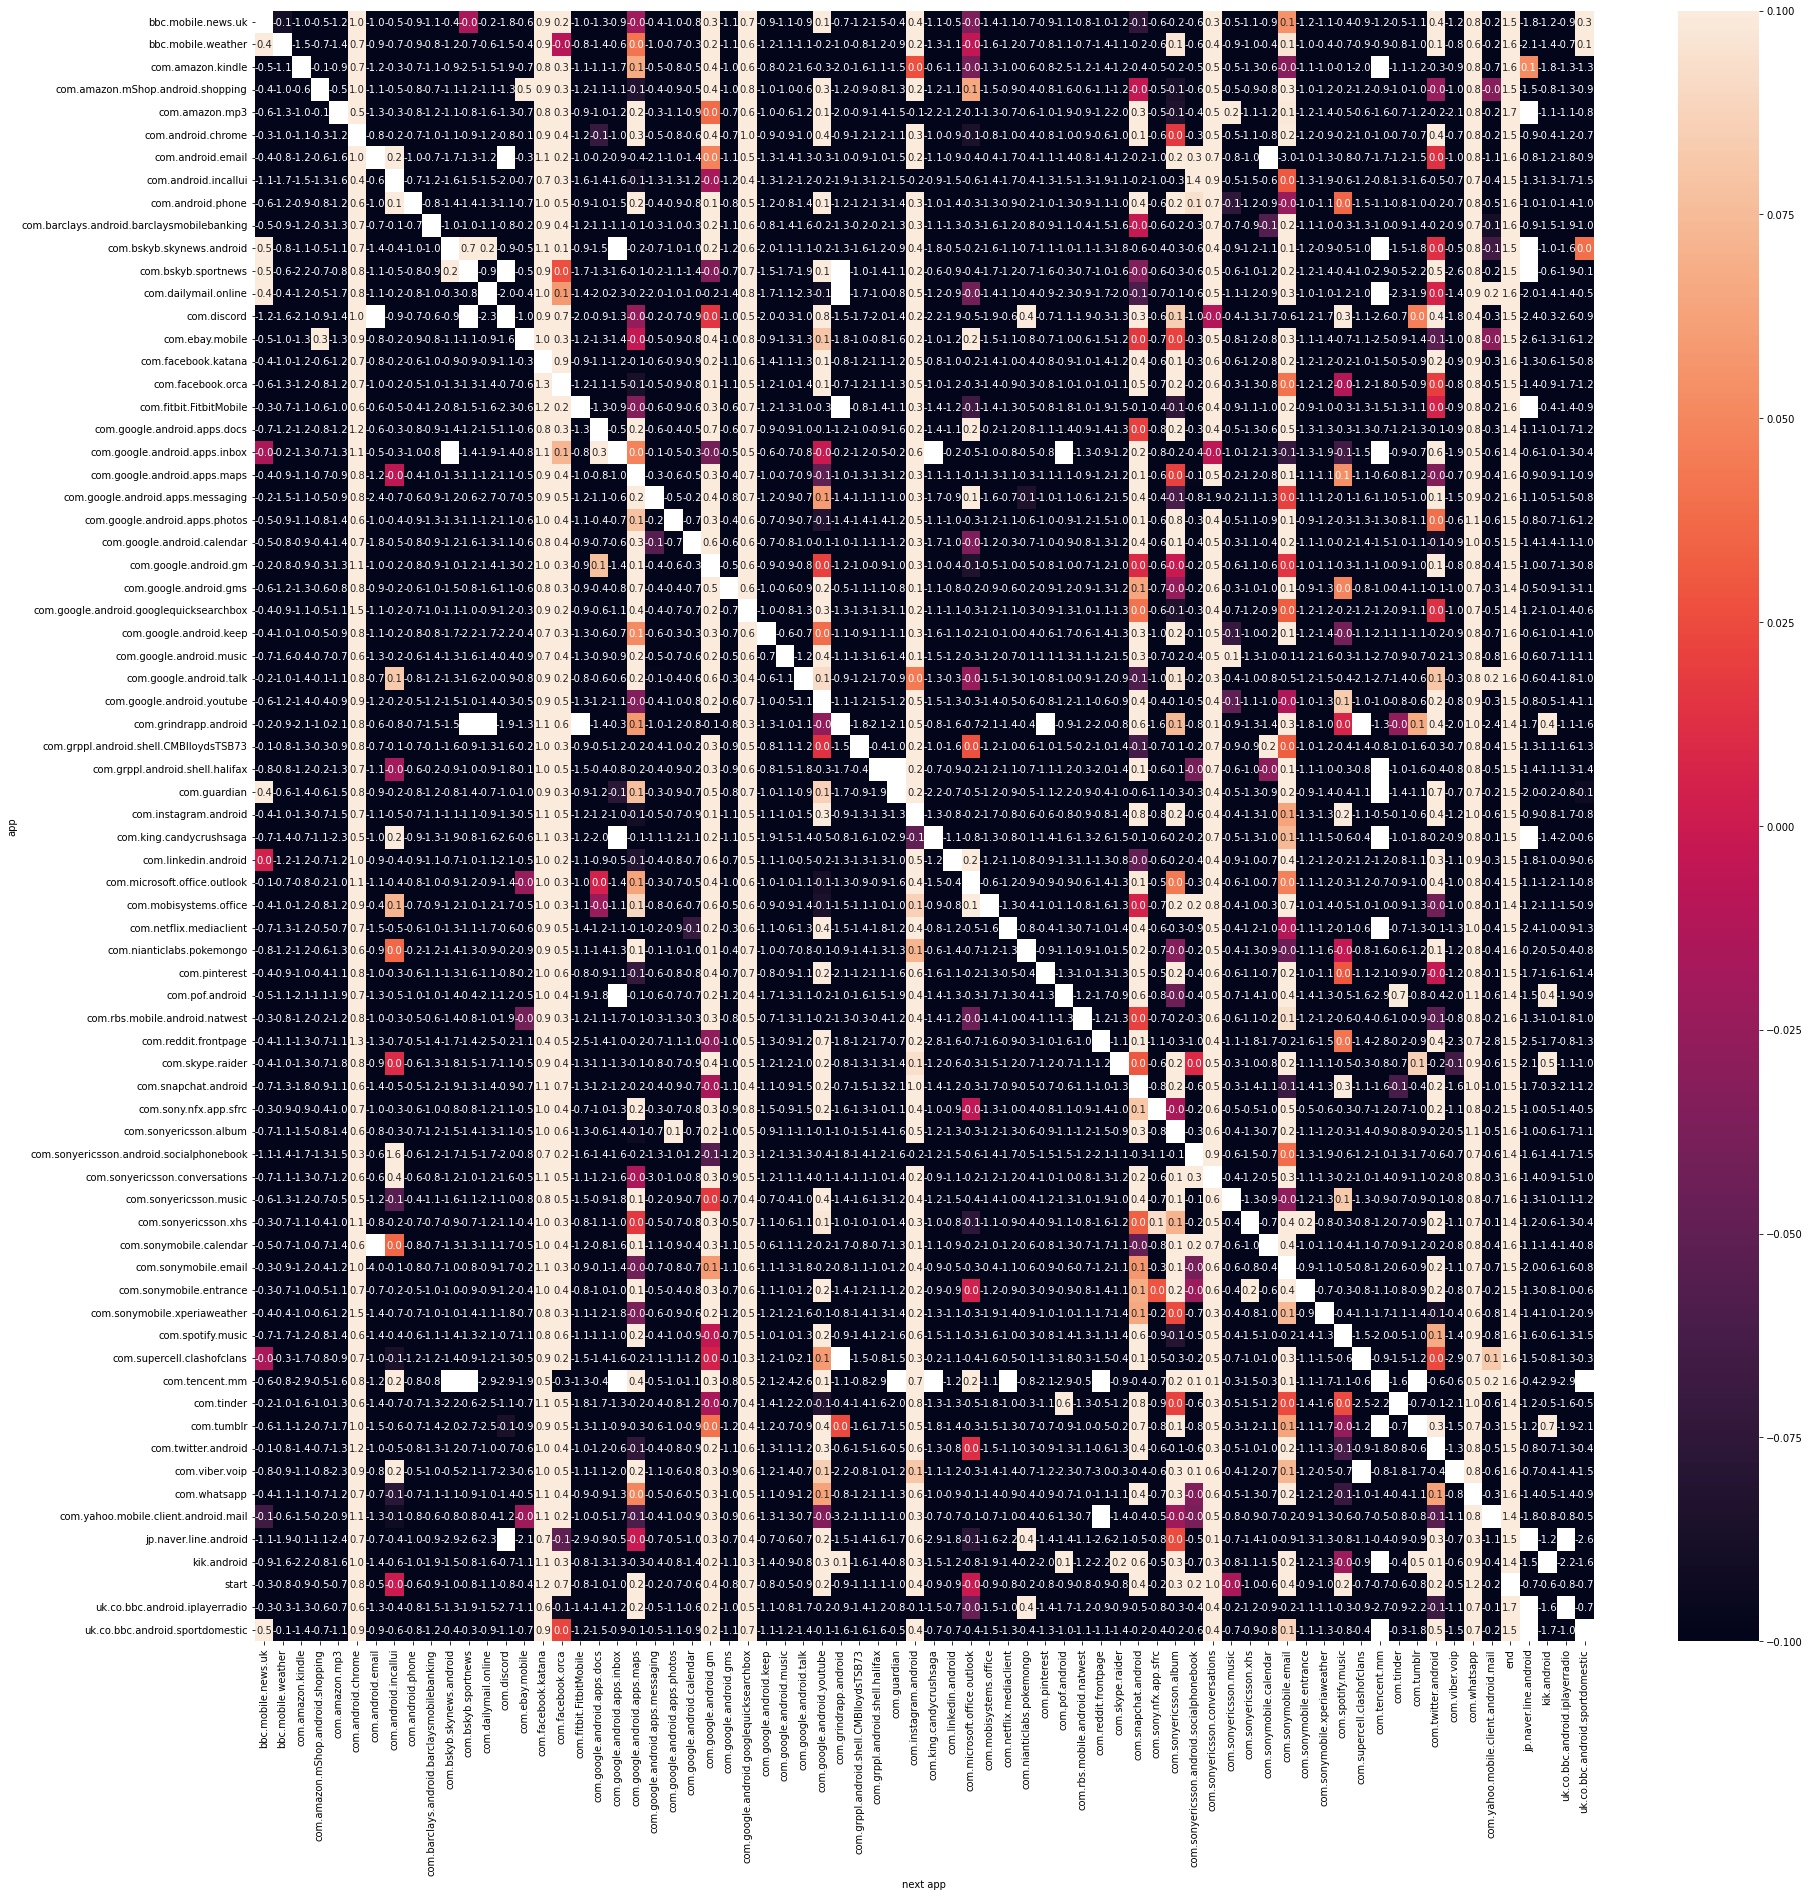

In [54]:
fig, ax = plt.subplots(figsize=(30,30))  
ax = sns.heatmap(np.log10(Transaction_matrix_c0_frequent),fmt=".1f", annot=True)
ax.set(xlabel='next app')
ax.set(ylabel='app')
plt.show()

#### 5.1.1 Group 1

#### 5.1.1 Group 2

#### 5.1.1 Group 3

#### 5.1.1 Group 4